### The objective of this script is to generate the sequence of noise kicks, that are used for the simulations with Sixtracklib and PyHEADTAIL, such as they correspond to a measured spectrum.

**Methodology**
1) Load the measure spectrum, power spectral density in (dBc/Hz)

2) Convert the power spectral density in rad^2/Hz

3) Inverse Fourier transform of the square root of the noise power

4) Scaling factor to the CC kick (both for RFMultipole in Sixtracklib and the momentum kick in PyHEADTAIL

5) Sanity check: Compute and plot the PSD of the resulted signal. Is it the same with the measured one?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
params = {'legend.fontsize': 16,
          'axes.labelsize': 17,
          'xtick.labelsize': 17,
          'ytick.labelsize': 17}

plt.rc('text', usetex=False)
plt.rcParams.update(params)

1) Load the data in a data frame and make them numpy.array for easier analysis

In [4]:
df = pd.read_csv("coast3EX-10DBm.csv")

In [5]:
df

,Offset Frequency (Hz),Phase Noise (dBc/Hz)
0,1000.000000,-103.746045
1,1018.009751,-103.823889
2,1036.343854,-104.874646
3,1055.008148,-104.950599
4,1074.008583,-105.575700
...,...,...
383,931091.255809,-144.238890
384,947859.977652,-143.591741
385,964930.700003,-143.434868
386,982308.861817,-143.406605


2) Convert the power spectral density in rad^2/Hz

\begin{equation}
S(f) = 2 \cdot 10^{L(f)/10}
\end{equation}

where $\rm S(f)$ the power spectral density in $ \rm rad^2/Hz$ and $\rm L(f)$ the measurement in $ \rm dBc/Hz$.
More in the presentation of 8July2020.

In [14]:
psd = 2*10**(np.array(df['Phase Noise (dBc/Hz)'])/10) # rad^2/Hz, type: numpy.array
freq = np.array(df['Offset Frequency (Hz)'])

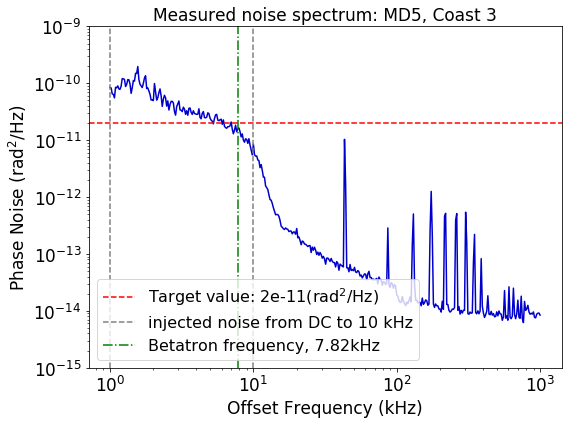

In [17]:
fig, ax1 = plt.subplots(figsize=(8,6))

ax1.plot(freq/1e3, psd, c='mediumblue')
ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_ylim(10**(-15), 10**(-9))
ax1.set_xlabel('Offset Frequency (kHz)')
ax1.set_ylabel('Phase Noise '+ r'$\rm (rad^2/Hz)$')
ax1.axhline(2*10**(-110/10), c='r', linestyle='dashed', label='Target value: {}'.format(2*10**(-110/10))+r'$(\rm rad^2/Hz)$')

ax1.axvline(1, c='grey', linestyle='dashed')
ax1.axvline(10, c='grey', linestyle='dashed', label='injected noise from DC to 10 kHz')

ax1.axvline(0.18*43.45, c='g', linestyle='dashdot', label='Betatron frequency, {:.3}kHz'.format(0.18*43.45))


ax1.legend(loc=3)
ax1.set_title('Measured noise spectrum: MD5, Coast 3', fontsize=17)

plt.tight_layout()
#plt.savefig('Measured_spectrum_MD5_coast_3_target2e-11rad2perHz.png')

3) Inverse Fourier transform of the square root of the noise power
(example script from Andy)

In [24]:
# Define the upper limit on the frequency range of the noise spectrum in units of the revolution frequency
frange = 43.45e3
#Calculate the phase errors from the inverse discrete Fourier transform of the noise power spectrum
PhaseErrors_fft = np.fft.ifft(np.sqrt(psd))